# Table of Contents
* [overview](#overview)
* [THOR interface](#THOR-interface)
* [Figures](#Figures)
	* [charts](#charts)
	* [heatmaps](#heatmaps)
		* [walls](#walls)
* [Volume](#Volume)
	* [# scenes](##-scenes)
	* [# assets](##-assets)


In [2]:
%%capture
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
from tqdm import tqdm as tqdm
from collections import defaultdict
from collections import Counter
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pylab as plt
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light default
#%base16_mplrc dark solarized
plt.rcParams['grid.linewidth'] = 0
plt.rcParams['figure.figsize'] = (16.0, 10.0)

import os
import cv2
import PIL.Image as Image

In [3]:
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

In [4]:
def make_standard_fig(fig_plt, fig_labels=None, save = False, outfile='fig.pdf', main_color=None, label_color = '0.25'):
    if fig_labels:
        if 'fig_title' in fig_labels:
            plt.title(fig_labels['fig_title'], fontsize=35, verticalalignment='bottom', color=label_color, y=1.02)
        if 'y_label' in fig_labels:
            plt.ylabel(fig_labels['y_label'], fontsize=35, labelpad=10, color=label_color)
        if 'x_label' in fig_labels:
            plt.xlabel(fig_labels['x_label'], fontsize=30, labelpad=10, color=label_color)
    plt.tick_params(axis='x', which='major', labelsize=28)
    plt.tick_params(axis='y', which='major', labelsize=23)
    if save:
        plt.savefig(outfile, bbox_inches='tight', facecolor=(1, 1, 1, 1), pad_inches = 0)

# overview

In [5]:
scene_names_df = pd.read_csv('/Users/schwenk/wrk/transfer/src/ai2thor/scene_list.txt', header=None)
scene_names_df.columns = ['name']

scene_names_df['split'] = scene_names_df.name.str.lower().str.split('_').apply(lambda x: ''.join([i for i in x[1].strip() if not i.isdigit()]))
scene_names_df.name = scene_names_df.name.str.strip()
scene_counts = pd.DataFrame(scene_names_df.split.value_counts())
all_scenes = scene_names_df.name.tolist()
scene_counts

,split
train,75
rtest,10
rval,4


<img  src="robot_dataset_section.jpg"/>

# THOR interface

In [6]:
from thor_interface.scene_data import get_scene_metadata
from thor_interface.scene_data import multiscene

In [7]:
import ai2thor.controller
import pickle
import json


controller = ai2thor.controller.Controller()

In [8]:
def get_scene_metadata(scene_id):
    print(scene_id)
    controller.reset(scene_id)
    meta_event = controller.step(dict(action='Initialize', gridSize=0.25))
    return meta_event.metadata

def get_reachable_pos(scene_id):
    print(scene_id)
    controller.reset(scene_id)
    meta_event = controller.step(dict(action='Initialize', gridSize=0.25))
    meta_event = controller.step(dict(action='GetReachablePositions'))
    return meta_event

def label_targets(obj_cat):
    if obj_cat in used_arget_objs:
        return 'target'
    if obj_cat in all_targets:
        
        return 'expanded target'
    else:
        return 'background'

In [9]:
used_arget_objs = ['Television', 'Mug', 'Apple', 'AlarmClock', 'BasketBall']


all_targets = [
                'AlarmClock',  
                'Apple',
                'BaseballBat',
                'BasketBall',
                'Bowl',
                'GarbageCan',
                'HousePlant',
                'Laptop',
                'Mug',
                'Pillow',
                'RemoteControl',
                'SprayBottle',
                'Television',
                'Vase',
            ]


furn_vs_obj_def = {
    'ArmChair': 'furniture',
    'Bed': 'furniture',
     'Book': 'object',
     'Bowl': 'object',
     'Newspaper': 'object',
     'SaltShaker': 'object', 
     'PepperShaker': 'object', 
     'ButterKnife': 'object',
     'Candle': 'object',
     'Pen': 'object',
     'Pencil': 'object',
     'TennisRacket': 'object',
     'TeddyBear': 'object',
     'BasketBall': 'object',
     'CD': 'object',
     'Lamp': 'object',
     'Chair': 'furniture',
     'Ottoman': 'furniture',
     'CoffeeTable': 'furniture',
     'TVStand': 'furniture',
     'Desk': 'furniture',
     'DeskLamp': 'object',
     'DiningTable': 'furniture',
     'Dresser': 'furniture',
     'Drawer': 'furniture',
     'Fork': 'object',
     'HousePlant': 'object',
     'Mug': 'object',
     'Plate': 'object',
     'Shelf': 'furniture',
     'SideTable': 'furniture',
     'Sofa': 'furniture',
     'FloorLamp': 'furniture',
     'Box': 'object',
     'Vase': 'object',
     'Glassbottle': 'object',
     'GarbageCan': 'object',
     'SprayBottle': 'object',
     'Cup': 'object',
     'BaseballBat': 'object',
     'Television': 'object',
     'Pillow': 'object',
     'CellPhone': 'object',
     'Apple': 'object',
     'Pot': 'object',
     'Watch': 'object',
     'Statue': 'object',
     'Laptop': 'object',
     'AlarmClock': 'object',
     'RemoteControl': 'object',
}


In [10]:
# controller.start()
# multi_scene_data = {scene_id: get_scene_metadata(scene_id) for scene_id in all_scenes}

In [25]:
multi_scene_reachable_pos = {scene_id: get_reachable_pos(scene_id) for scene_id in all_scenes}

FloorPlan_Train10_1
FloorPlan_Train10_2
FloorPlan_Train10_3
FloorPlan_Train10_4
FloorPlan_Train10_5
FloorPlan_Train11_1
FloorPlan_Train11_2
FloorPlan_Train11_3
FloorPlan_Train11_4
FloorPlan_Train11_5
FloorPlan_Train12_1
FloorPlan_Train12_2
FloorPlan_Train12_3
FloorPlan_Train12_4
FloorPlan_Train12_5
FloorPlan_Train13_1
FloorPlan_Train13_2
FloorPlan_Train13_3
FloorPlan_Train13_4
FloorPlan_Train13_5
FloorPlan_Train14_1
FloorPlan_Train14_2
FloorPlan_Train14_3
FloorPlan_Train14_4
FloorPlan_Train14_5
FloorPlan_Train15_1
FloorPlan_Train15_2
FloorPlan_Train15_3
FloorPlan_Train15_4
FloorPlan_Train15_5
FloorPlan_Train1_1
FloorPlan_Train1_2
FloorPlan_Train1_3
FloorPlan_Train1_4
FloorPlan_Train1_5
FloorPlan_Train2_1
FloorPlan_Train2_2
FloorPlan_Train2_3
FloorPlan_Train2_4
FloorPlan_Train2_5
FloorPlan_Train3_1
FloorPlan_Train3_2
FloorPlan_Train3_3
FloorPlan_Train3_4
FloorPlan_Train3_5
FloorPlan_Train4_1
FloorPlan_Train4_2
FloorPlan_Train4_3
FloorPlan_Train4_4
FloorPlan_Train4_5
FloorPlan_Train5_1
F

In [12]:
# with open('multi_scene_reachable_pos.pkl', 'wb') as f:
#     pickle.dump(multi_scene_reachable_pos, f)

# with open('multi_scene_data.pkl', 'wb') as f:
#     pickle.dump(multi_scene_data, f)

with open('multi_scene_reachable_pos.pkl', 'rb') as f:
    multi_scene_reachable_pos = pickle.load(f)
    
with open('multi_scene_data.pkl', 'rb') as f:
    multi_scene_data = pickle.load(f)

In [13]:
def get_objects_vis(sim_point):
    exclude_strings = ['wall_', 'floor', 'ceiling']
    instances = sim_point.instance_detections2D
    return len(instances)

In [14]:
def teleport(pos):
    rot = pos.get('rotation', 0)
    new_pos = controller.step(action='TeleportFull', x=pos['x'], y=pos['y'], z=pos['z'], rotation=rot)
    if not new_pos.metadata['lastActionSuccess']:
#         print(new_pos.metadata['errorMessage'])
        return False
    return new_pos

In [28]:
# controller.start()
controller.step(dict(action='Initialize', gridSize=0.25, fieldOfView=42.5, renderObjectImage=True))

In [16]:
val_reachable = {s: dat for s, dat in multi_scene_reachable_pos.items() if 'Val' in s}

In [17]:
relevant_fields = ['name', 'objectType', 'objectId', 'position']

build_furn_obj_df = []
for scene, objects in multi_scene_data.items():
    scene_objects = [{f: o[f] for f in relevant_fields} for o in objects['objects']]
    _ = [o.update({'scene': scene}) for o in scene_objects]
    build_furn_obj_df.extend(scene_objects)

In [18]:
furn_obj_df = pd.DataFrame(build_furn_obj_df)
furn_obj_df['category'] = furn_obj_df.objectType.apply(lambda x: furn_vs_obj_def[x])
furn_obj_df['role'] = furn_obj_df.objectType.apply(label_targets)

furn_obj_df['category'] = furn_obj_df.objectType.apply(lambda x: furn_vs_obj_def[x])

In [19]:
furn_obj_df.name.value_counts().shape

(866,)

In [20]:
furn_obj_df['z'] = furn_obj_df['position'].apply(lambda x: x['z'])
furn_obj_df['x'] = furn_obj_df['position'].apply(lambda x: x['x'])

# Figures

## objects visible

In [33]:
count_vis = []
for scene_id, positions in val_reachable.items():
    rotations = [0, 90, 180, 270]
    for rp in tqdm(positions.metadata['reachablePositions']):
        for rot in rotations:
            rp['rotation'] = rot
            new_pos = teleport(rp)
            if not new_pos:
                continue
            n_visible = get_objects_vis(new_pos)
            if n_visible:
                count_vis.append(n_visible)
vis_ser = pd.Series(count_vis)


 69%|██████▊   | 155/226 [00:29<00:13,  5.16it/s]


 30%|███       | 84/279 [00:16<00:40,  4.83it/s]


 85%|████████▌ | 238/279 [00:46<00:08,  5.09it/s]


 46%|████▌     | 114/247 [00:23<00:25,  5.30it/s]


  8%|▊         | 21/261 [00:04<00:50,  4.75it/s]


 68%|██████▊   | 177/261 [00:35<00:16,  5.00it/s]


100%|██████████| 261/261 [00:51<00:00,  5.49it/s]

In [40]:
vis_ser.shape

(2345,)

In [41]:
vis_ser = pd.Series(count_vis)

In [43]:
vis_ser = vis_ser[vis_ser > 0]

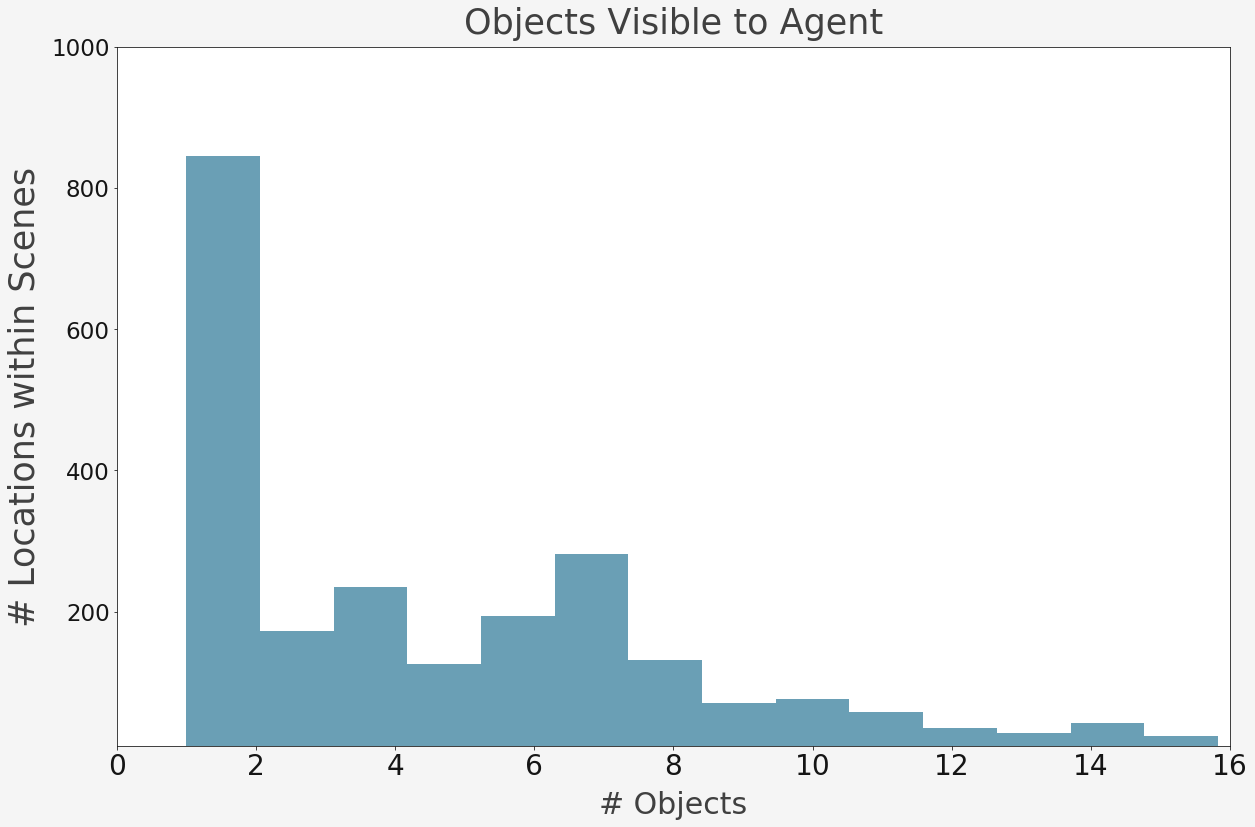

In [46]:
vis_ser.hist(bins=17)

fig_labels = {
    'fig_title': 'Objects Visible to Agent',
      'x_label': '# Objects',
      'y_label': '# Locations within Scenes'
}
plt.xlim(0, 16)
plt.ylim(10, 1000)
plt.tight_layout(pad=0)
make_standard_fig(_, fig_labels, save=True, outfile='./figures/val_objects_vis.pdf')

## shortest path

In [48]:
import networkx as nx
import math
import random
grid_size = 0.25


def key_for_point(point):
    return "{x:0.3f}|{z:0.3f}".format(**point)


def _build_graph_point(graph, point, grid_points):
    for p in grid_points:
        dist = math.sqrt(((point['x'] - p['x']) ** 2) + ((point['z'] - p['z']) ** 2))
        if dist <= (grid_size + 0.01) and dist > 0:
            graph.add_edge(key_for_point(point), key_for_point(p))

In [49]:
from scipy import spatial

def closest_grid_point(target_pos, grid_points):
    grid_points = [[p['x'], p['z']] for p in grid_points]
    target = [target_pos['x'], target_pos['z']]
    tree = spatial.KDTree(grid_points)
    dist, idx = tree.query(target)
    return grid_points[idx]

In [59]:
part_scene = 'FloorPlan_RVal2_2'

In [118]:
[p for p in start_point_sets[part_scene] if p['target'] == 'Television' and p['difficulty'] == 'hard']

[{'difficulty': 'hard',
  'real': False,
  'rotation': 270,
  'scene': 'FloorPlan_RVal2_2',
  'target': 'Television',
  'x': 3.5,
  'y': 0.900999248,
  'z': -4.5},
 {'difficulty': 'hard',
  'real': False,
  'rotation': 90,
  'scene': 'FloorPlan_RVal2_2',
  'target': 'Television',
  'x': 3.25,
  'y': 0.900999248,
  'z': -3.75},
 {'difficulty': 'hard',
  'real': False,
  'rotation': 90,
  'scene': 'FloorPlan_RVal2_2',
  'target': 'Television',
  'x': 2.75,
  'y': 0.900999248,
  'z': -3.75},
 {'difficulty': 'hard',
  'real': False,
  'rotation': 180,
  'scene': 'FloorPlan_RVal2_2',
  'target': 'Television',
  'x': 2.25,
  'y': 0.900999248,
  'z': -4.0},
 {'difficulty': 'hard',
  'real': True,
  'rotation': 90,
  'scene': 'FloorPlan_RVal2_2',
  'target': 'Television',
  'x': 2.5,
  'y': 0.900999248,
  'z': -3.5},
 {'difficulty': 'hard',
  'real': False,
  'rotation': 90,
  'scene': 'FloorPlan_RVal2_2',
  'target': 'Television',
  'x': 1.5,
  'y': 0.900999248,
  'z': -4.5},
 {'difficulty': 

In [71]:
human_comp_traj = [p for p in start_point_sets[part_scene] if p['target'] == 'Television' and p['difficulty'] == 'hard'][-2]

In [120]:
human_comp_traj_man = {'difficulty': 'hard',
                         'real': False,
                         'rotation': 0,
                         'scene': 'FloorPlan_RVal2_2',
                         'target': 'Television',
                         'x': 2.5,
                         'y': 0.900999248,
                         'z': -2.25}

In [125]:
shortest_comp_path = compute_single_shortest_path(part_scene, human_comp_traj_man)

{'x': 9.344, 'y': 0.699, 'z': -4.745}


In [124]:
def compute_single_shortest_path(scene, sp):
    scene_data = multi_scene_reachable_pos[scene]
    grid_points_dict = scene_data.metadata['actionReturn']
    graph = nx.Graph()
    scene_df = furn_obj_df[furn_obj_df['scene'] == scene]
    target_df = scene_df[scene_df.role == 'target']
    for point in grid_points_dict:
        _build_graph_point(graph, point, grid_points_dict)
    idx = {k: sp[k] for k in ['x', 'y', 'z']}
    target_pos = target_df[target_df['objectType'] == sp['target']]['position'].iloc[0]
    print(target_pos)
    target_grid_pt = closest_grid_point(target_pos, grid_points_dict)
    target_grid_pt = {'x': target_grid_pt[0], 'z': target_grid_pt[1]}
    short_path = nx.shortest_path(graph, key_for_point(target_grid_pt), key_for_point(sp))
    return short_path

In [50]:
def compute_val_test_shortest_paths(valtest_scenes, start_point_sets):
    shortest_paths = []
    for scene in valtest_scenes:
        scene_data = multi_scene_reachable_pos[scene]
        grid_points_dict = scene_data.metadata['actionReturn']
        graph = nx.Graph()
        for point in grid_points_dict:
            _build_graph_point(graph, point, grid_points_dict)
        scene_df = furn_obj_df[furn_obj_df['scene'] == scene]
        target_df = scene_df[scene_df.role == 'target']
        for sp in start_point_sets[scene]:
            idx = {k: sp[k] for k in ['x', 'y', 'z']}
            target_pos = target_df[target_df['objectType'] == sp['target']]['position'].iloc[0]
            target_grid_pt = closest_grid_point(target_pos, grid_points_dict)
            target_grid_pt = {'x': target_grid_pt[0], 'z': target_grid_pt[1]}
            short_path = nx.shortest_path(graph, key_for_point(target_grid_pt), key_for_point(sp))
            shortest_paths.append(short_path)
    return shortest_paths

In [51]:
def compute_train_shortest_paths(train_scenes):
    shortest_paths = []
    for scene in valtest_scenes:
        scene_data = multi_scene_reachable_pos[scene]
        grid_points_dict = scene_data.metadata['actionReturn']
        graph = nx.Graph()
        for point in grid_points_dict:
            _build_graph_point(graph, point, grid_points_dict)
        scene_df = furn_obj_df[furn_obj_df['scene'] == scene]
        target_df = scene_df[scene_df.role == 'target']
        for target_pos in target_df['position']:
            for i in range(20):
                sp = random.choice(grid_points_dict)
                idx = {k: sp[k] for k in ['x', 'y', 'z']}
                target_grid_pt = closest_grid_point(target_pos, grid_points_dict)
                target_grid_pt = {'x': target_grid_pt[0], 'z': target_grid_pt[1]}
                short_path = nx.shortest_path(graph, key_for_point(target_grid_pt), key_for_point(sp))
                shortest_paths.append(short_path)
    return shortest_paths

In [52]:
with open('./start_points_val.json') as f:
    val_start_points = json.load(f)['start_points']
    
with open('./start_points_test.json') as f:
    test_start_points = json.load(f)['start_points']

start_point_sets = defaultdict(list)
for p in val_start_points + test_start_points:
    start_point_sets[p['scene']].append(p)

In [53]:
valtest_scenes = all_scenes[-14:]
train_scenes = all_scenes[:-14]

In [54]:
sptc = compute_train_shortest_paths(train_scenes)

In [55]:
sppc = compute_val_test_shortest_paths(valtest_scenes, start_point_sets)

In [56]:
sppc[0]

['5.750|-4.000', '5.750|-3.750', '6.000|-3.750', '6.000|-3.500']

In [55]:
path_len_ser = pd.Series([len(p) for p in sppc])

In [56]:
path_len_ser.median()

22.0

In [80]:
def check_prev_points(cp, p1, p2):
    directions = []
    for ca in ['x', 'y']:
        if p1[ca] != p2[ca]:
            directions.append(ca)
        if p1[ca] != cp[ca]:
            directions.append(ca)
    if len(set(directions)) == len(directions):
        return 'turn'
    else:
        return 'go straight'
    return directions


def format_coords(path):
    coords = [[float(c) for c in co.split('|')] for co in path]
    coords = [{'x': c[0], 'y': c[1]} for c in coords]
    return coords


def assign_action_seq(path):
    coords = format_coords(path)
    p2 = None
    p1 = None
    actions = []
    for cp in coords:
        if not p1:
            p1 = cp
            continue
        if not p2:
            p2 = p1
            p1 = cp
            actions.append('go straight')
            continue
        path_check = check_prev_points(cp, p1, p2)
        actions.append(path_check)
        p2 = p1
        p1 = cp
    return actions

In [58]:
action_seqs = [pd.Series(assign_action_seq(p)).value_counts() for p in sppc]
action_seqs_train = [pd.Series(assign_action_seq(p)).value_counts() for p in sptc]

In [59]:
action_seq_df = pd.DataFrame(action_seqs)
action_seq_train_df = pd.DataFrame(action_seqs_train)

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


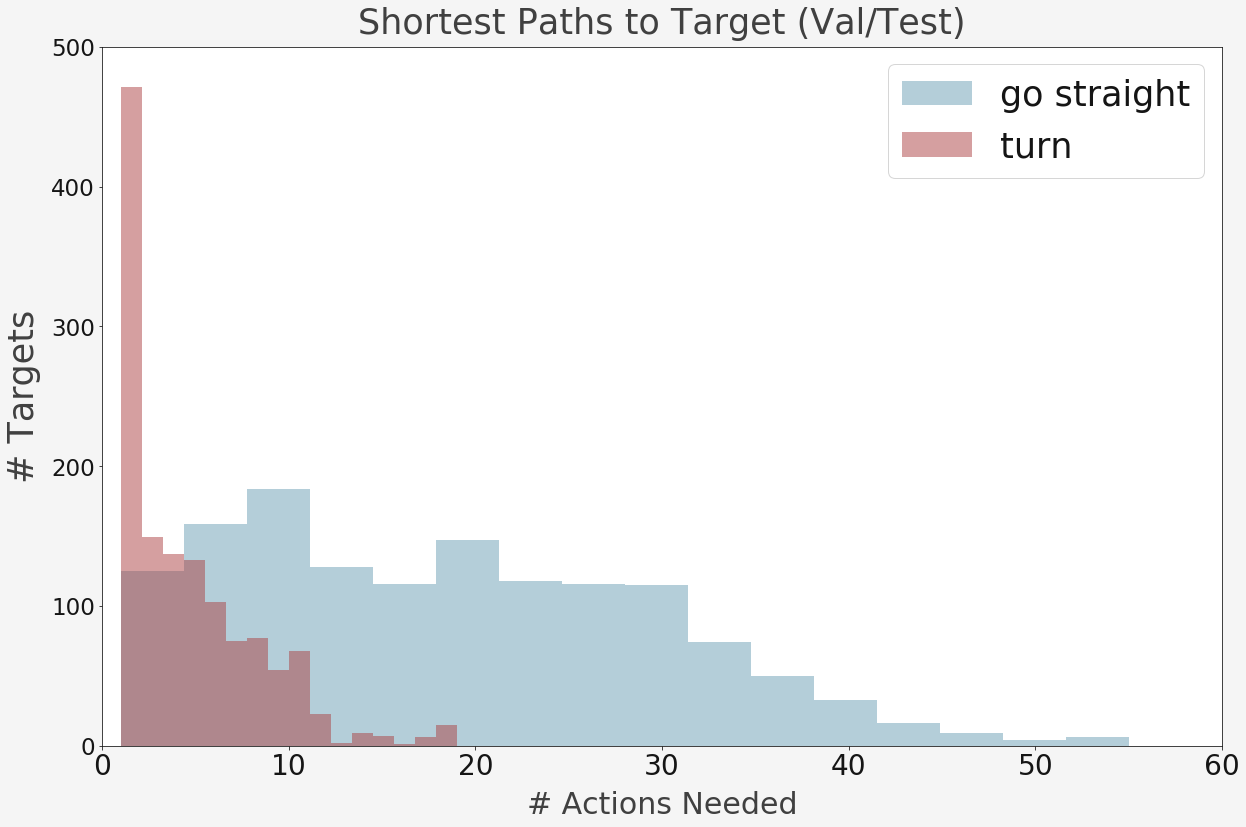

In [60]:
n_bins = 16
plt.hist(action_seq_df['go straight'], bins=n_bins, alpha=0.5, label='go straight')
plt.hist(action_seq_df['turn'], bins=n_bins, alpha=0.5, label='turn')
_ = plt.legend(loc='upper right', fontsize=35)

fig_labels = {
    'fig_title': 'Shortest Paths to Target (Val/Test)',
      'x_label': '# Actions Needed',
      'y_label': '# Targets'
}
plt.xlim(0, 60)
plt.ylim(0, 500)
plt.tight_layout(pad=0)
make_standard_fig(_, fig_labels, save=True, outfile='./figures/val_test_shortest_paths_composit.pdf')

In [61]:
scene_names_df[scene_names_df.split == 'train']['name'].to_csv('train_scenes.csv', index=False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


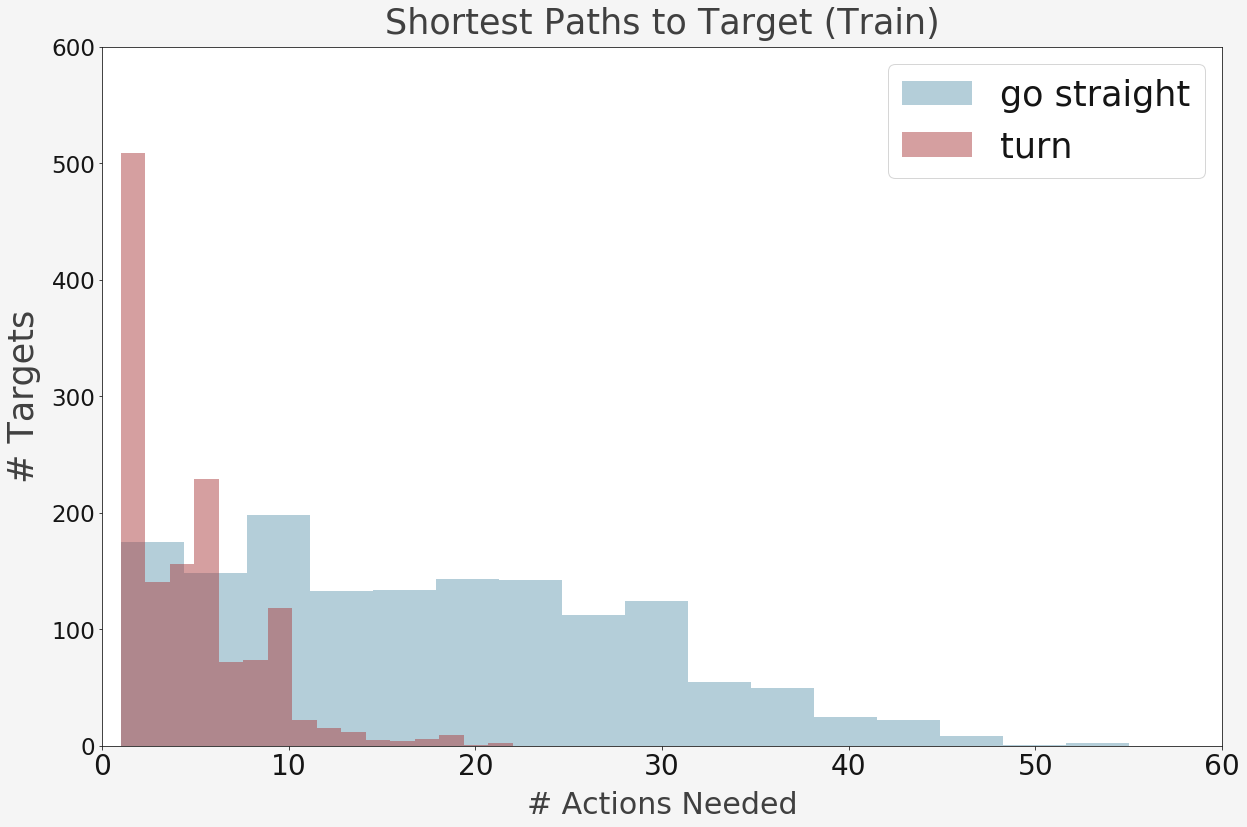

In [65]:
n_bins = 16
plt.hist(action_seq_train_df['go straight'], bins=n_bins, alpha=0.5, label='go straight')
plt.hist(action_seq_train_df['turn'], bins=n_bins, alpha=0.5, label='turn')
_ = plt.legend(loc='upper right', fontsize=35)

fig_labels = {
    'fig_title': 'Shortest Paths to Target (Train)',
      'x_label': '# Actions Needed',
      'y_label': '# Targets'
}
plt.xlim(0, 60)
plt.ylim(0, 600)
plt.tight_layout(pad=0)
make_standard_fig(_, fig_labels, save=True, outfile='./figures/train_shortest_paths_composit.pdf')

In [64]:
# _ = path_len_ser.hist(bins=20)

# fig_labels = {
#     'fig_title': 'Shortest Paths to Target',
#       'x_label': '# Actions Needed',
#       'y_label': '# Targets'
# }
# plt.xlim(0, 70)
# plt.ylim(0, 170)
# make_standard_fig(_, fig_labels, save=True, outfile='./figures/val_test_shortest_paths.pdf')

In [191]:
len(test_sp)

100

In [97]:
scene_1 = 'FloorPlan_RVal2_2'

In [115]:
target_df

,name,objectId,objectType,position,scene,category,role,z,x
17,Television_16,Television|+07.04|+00.79|-02.97,Television,"{'x': 7.04, 'y': 0.785, 'z': -2.967}",FloorPlan_Train10_1,object,target,-2.967,7.040
19,Apple_16,Apple|+01.92|+00.36|-02.97,Apple,"{'x': 1.923, 'y': 0.3554, 'z': -2.969}",FloorPlan_Train10_1,object,target,-2.969,1.923
25,Alarm_Clock_16,AlarmClock|+02.51|+00.48|-04.63,AlarmClock,"{'x': 2.511, 'y': 0.48, 'z': -4.634}",FloorPlan_Train10_1,object,target,-4.634,2.511
26,Mug_1,Mug|+09.36|+00.47|-02.23,Mug,"{'x': 9.36, 'y': 0.47, 'z': -2.23}",FloorPlan_Train10_1,object,target,-2.230,9.360


In [88]:
scene_df = furn_obj_df[furn_obj_df['scene'] == scene_1]
target_df = scene_df[scene_df.role == 'target']

In [113]:
with open('./start_points_val.json') as f:
    val_start_points = json.load(f)['start_points']
    
with open('./start_points_test.json') as f:
    test_start_points = json.load(f)['start_points']

start_point_sets = defaultdict(list)
for p in val_start_points + test_start_points:
    start_point_sets[p['scene']].append(p)

### hide

In [400]:
import random

In [434]:
test_paths = random.sample([format_coords(path) for path in  sppc], 15)

In [122]:
with open('../hands/human_action_comp.pkl', 'rb') as f:
    human_action_comp = pickle.load(f)

for p in human_action_comp:
    p['y'] = round(p['z'], 2)
    p['x'] = round(p['x'], 2)
    p.pop('z')

In [ ]:
{'x': 9.344, 'y': 0.699, 'z': -4.745}


In [129]:
human_action_comp

[{'x': 2.5, 'y': -2.25},
 {'x': 2.75, 'y': -2.25},
 {'x': 3.0, 'y': -2.25},
 {'x': 3.25, 'y': -2.25},
 {'x': 3.25, 'y': -2.49},
 {'x': 3.25, 'y': -2.75},
 {'x': 3.25, 'y': -3.0},
 {'x': 3.25, 'y': -3.24},
 {'x': 3.25, 'y': -3.49},
 {'x': 3.25, 'y': -3.49},
 {'x': 3.26, 'y': -3.74},
 {'x': 3.26, 'y': -4.0},
 {'x': 3.01, 'y': -4.0},
 {'x': 2.76, 'y': -4.0},
 {'x': 2.5, 'y': -4.0},
 {'x': 2.25, 'y': -4.0},
 {'x': 2.25, 'y': -3.75},
 {'x': 2.25, 'y': -3.5},
 {'x': 2.25, 'y': -3.25},
 {'x': 2.24, 'y': -3.01},
 {'x': 2.24, 'y': -2.75},
 {'x': 2.49, 'y': -2.75},
 {'x': 2.75, 'y': -2.75},
 {'x': 3.0, 'y': -2.75},
 {'x': 3.25, 'y': -2.75},
 {'x': 3.25, 'y': -2.75},
 {'x': 3.25, 'y': -2.5},
 {'x': 3.24, 'y': -2.25},
 {'x': 3.24, 'y': -2.25},
 {'x': 3.49, 'y': -2.25},
 {'x': 3.74, 'y': -2.25},
 {'x': 3.5, 'y': -2.25},
 {'x': 3.26, 'y': -2.25},
 {'x': 3.0, 'y': -2.26},
 {'x': 2.75, 'y': -2.26},
 {'x': 2.75, 'y': -2.5},
 {'x': 2.75, 'y': -2.75},
 {'x': 2.75, 'y': -3.01},
 {'x': 2.75, 'y': -3.26},
 

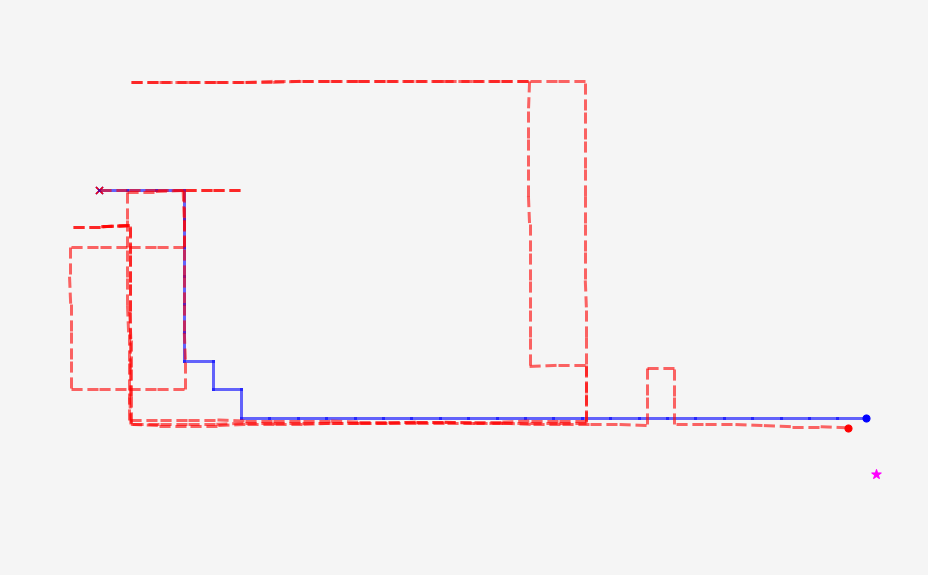

In [147]:
def connectpoints(p1, p2, color, linestyle='-'):
    x1, x2 = p1['x'], p2['x']
    y1, y2 = p1['y'], p2['y']
    plt.plot([x1, x2], [y1, y2],'k-', color=color, alpha=0.6, linestyle=linestyle, linewidth=3)

def draw_path(path, path_color='blue', linestyle='-'):
#     path_color = np.random.rand(3,)
    prev_point = None
    for cp in path:
        if not prev_point:
            prev_point = cp
            plt.scatter(cp['x'], cp['y'], color=path_color, s=50, marker='x')
        else:
            connectpoints(cp, prev_point, path_color, linestyle)
            prev_point = cp
    plt.scatter(cp['x'], cp['y'], s=50,color=path_color, marker='o')
    

draw_path(format_coords(shortest_comp_path[::-1]))
draw_path(human_action_comp, path_color='red', linestyle='--')
plt.scatter(9.344, -4.745, color='magenta', s=100, marker='*')
_ = plt.axis('off')
plt.xlim(1, 9.5)
plt.ylim(-4, -2)
plt.axis('equal')
plt.savefig('overlay.png', transparent=True, dpi=500)
plt.show()

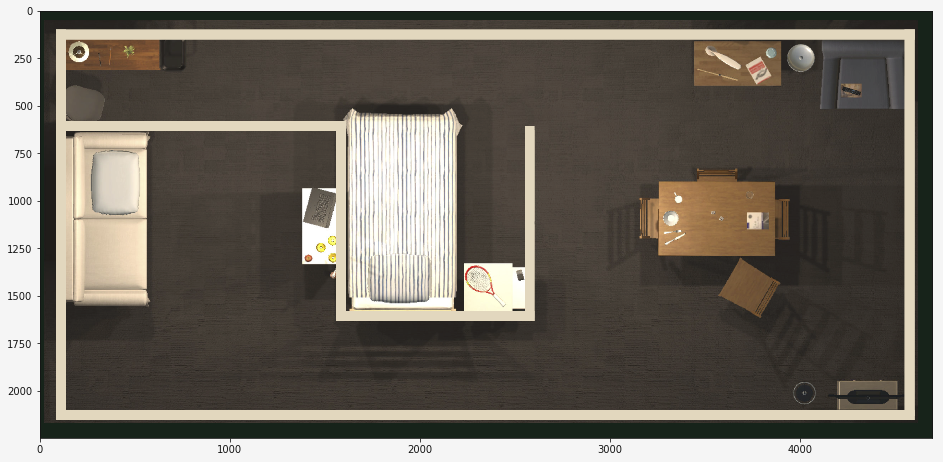

In [141]:
implot = plt.imshow(im)


In [139]:
im = plt.imread('top_down.png')

##  asset counts

In [294]:
def make_donut_fig(fig_plt, fig_labels=None, save = False, outfile='fig.pdf', main_color=None, label_color = '0.25'):
    if fig_labels:
        if 'fig_title' in fig_labels:
            plt.title(fig_labels['fig_title'], fontsize=65, verticalalignment='bottom', color=label_color, y=1.02)
        if 'y_label' in fig_labels:
            plt.ylabel(fig_labels['y_label'], fontsize=35, labelpad=10, color=label_color)
        if 'x_label' in fig_labels:
            plt.xlabel(fig_labels['x_label'], fontsize=30, labelpad=10, color=label_color)
    plt.tick_params(axis='x', which='major', labelsize=28)
    plt.tick_params(axis='y', which='major', labelsize=23)
    if save:
        plt.savefig(outfile, bbox_inches='tight', facecolor=(1, 1, 1, 1), pad_inches = 0)

        
def make_donut_plot(donut_data, startangle=-40):
    fig, ax = plt.subplots(figsize=(16, 15), subplot_kw=dict(aspect="equal"))

    labels = []
    for c, count, in donut_data:
        if len(c) < 100:
            labels.append(f'{count} {c}s')
        else:
            labels.append(f'{c}')

    data = list(zip(*donut_data))[1]

    wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=startangle)

    bbox_props = dict(boxstyle="square, pad=0.1", fc="w", ec="k", lw=0.0)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1) / 2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.35 *np.sign(x), 1.3 * y),
                    horizontalalignment=horizontalalignment, **kw, fontsize=40)

#     ax.set_title(title)
    return fig

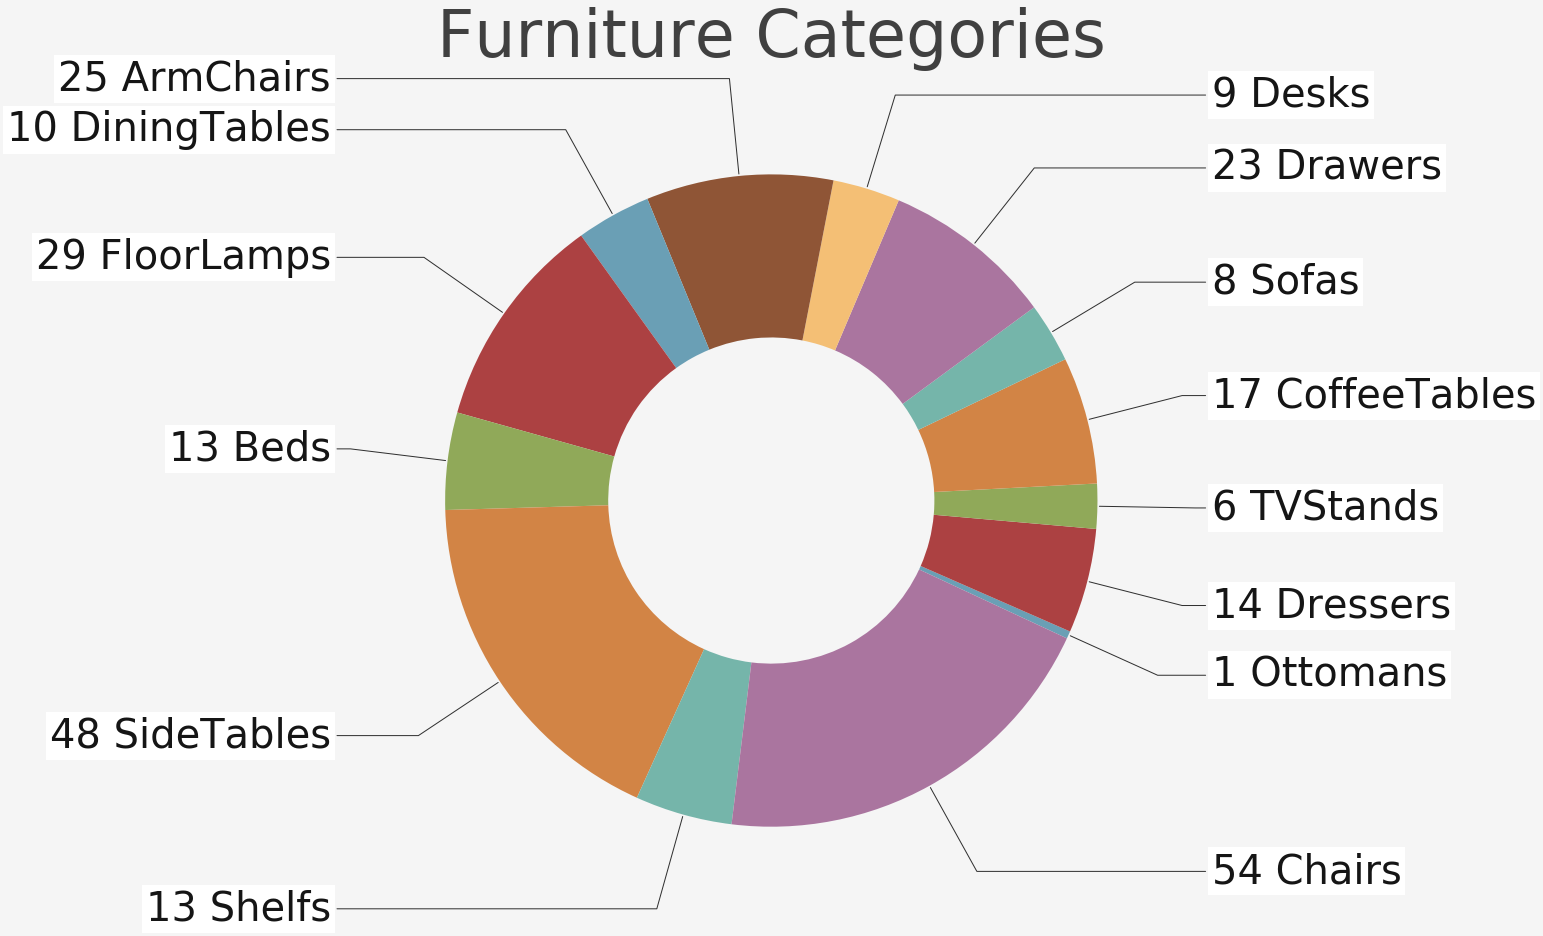

In [295]:
obj_cat_counts = furn_obj_df[furn_obj_df.category == 'furniture'].groupby('objectType')['name'].nunique()
donut_data = list(obj_cat_counts.to_dict().items())
donut_data = sorted(donut_data, key=lambda x: x[1])
donut_data = [val for pair in zip(donut_data[:len(donut_data)//2], donut_data[len(donut_data)//2:]) for val in pair]

fig_labels = {
    'fig_title': 'Furniture Categories',
      'x_label': '',
      'y_label': ''
}

fig_out = make_donut_plot(donut_data, -25)
_ = make_donut_fig(_, fig_labels, save=True, outfile='./figures/furniture_cats.pdf')

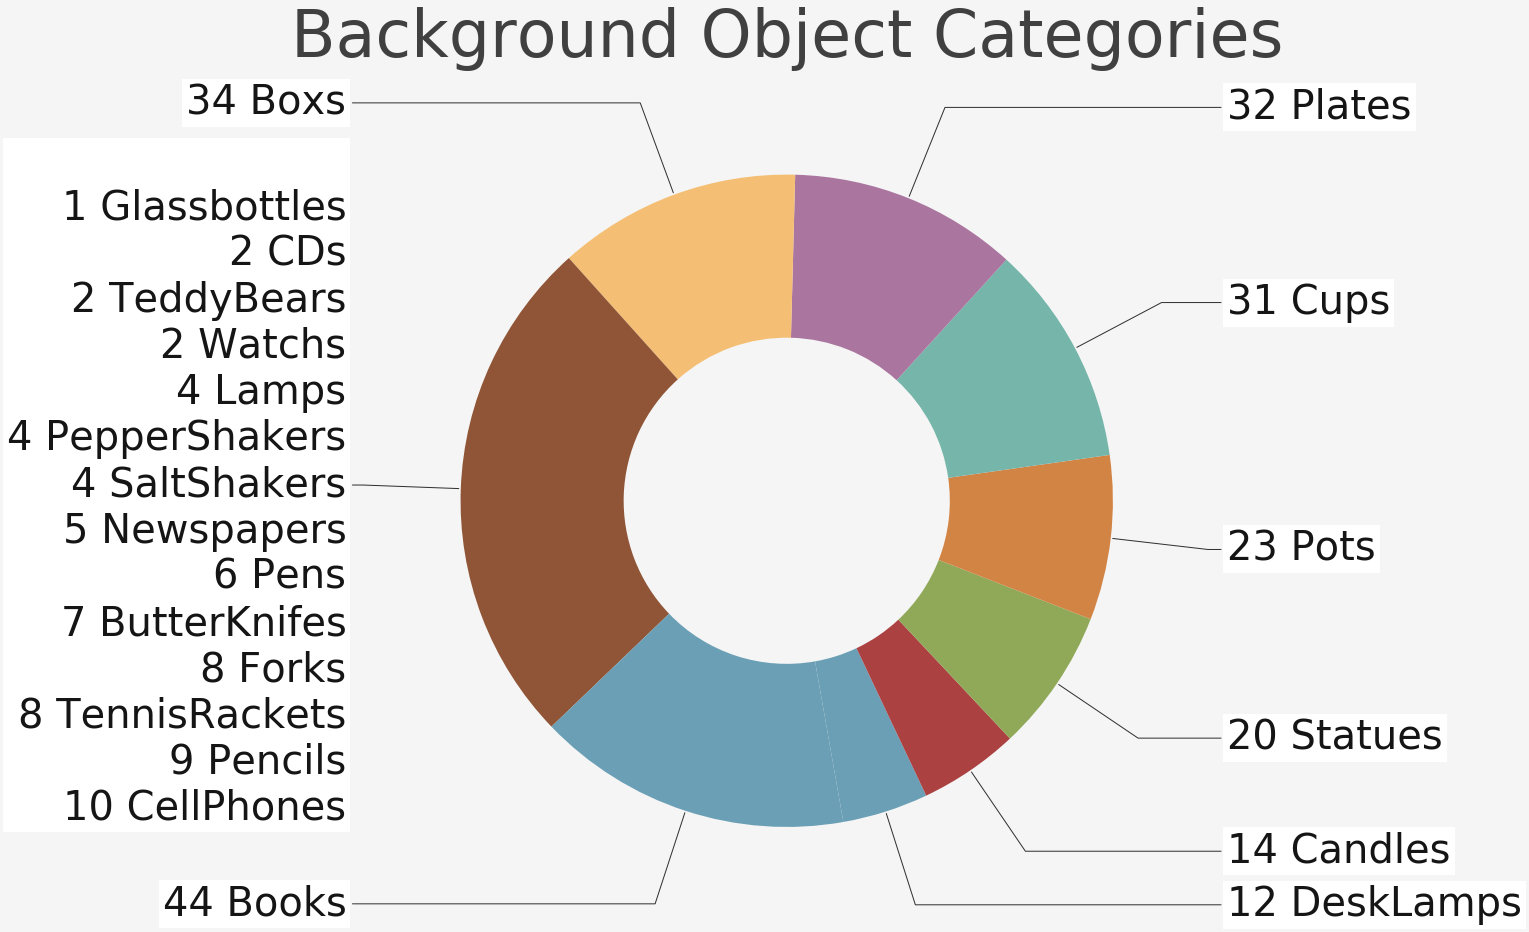

In [296]:
obj_only_df = furn_obj_df[furn_obj_df.category == 'object']
bg_obj_df = obj_only_df[obj_only_df.role == 'background']
obj_cat_counts = bg_obj_df.groupby('objectType')['name'].nunique()
donut_data = list(obj_cat_counts.to_dict().items())
donut_data = sorted(donut_data, key=lambda x: x[1])
atr_dd = []
atr = ''
atr_count = 0
for n, c in donut_data:

    if c > 10:
        atr_dd.append([n, c])
    else:
        atr = '\n'.join([atr, f'{c} {n}s'])
        atr_count += c
atr_dd = atr_dd[:-1] + [[atr, atr_count]] + atr_dd[-1:] 
# donut_data = [val for pair in zip(donut_data[:len(donut_data)//2][::-1], donut_data[len(donut_data)//2:]) for val in pair]

fig_labels = {
    'fig_title': 'Background Object Categories',
      'x_label': '',
      'y_label': ''
}

fig_out = make_donut_plot(atr_dd, -80)
_ = make_donut_fig(fig_out, fig_labels, save=True, outfile='./figures/background_cats.pdf')

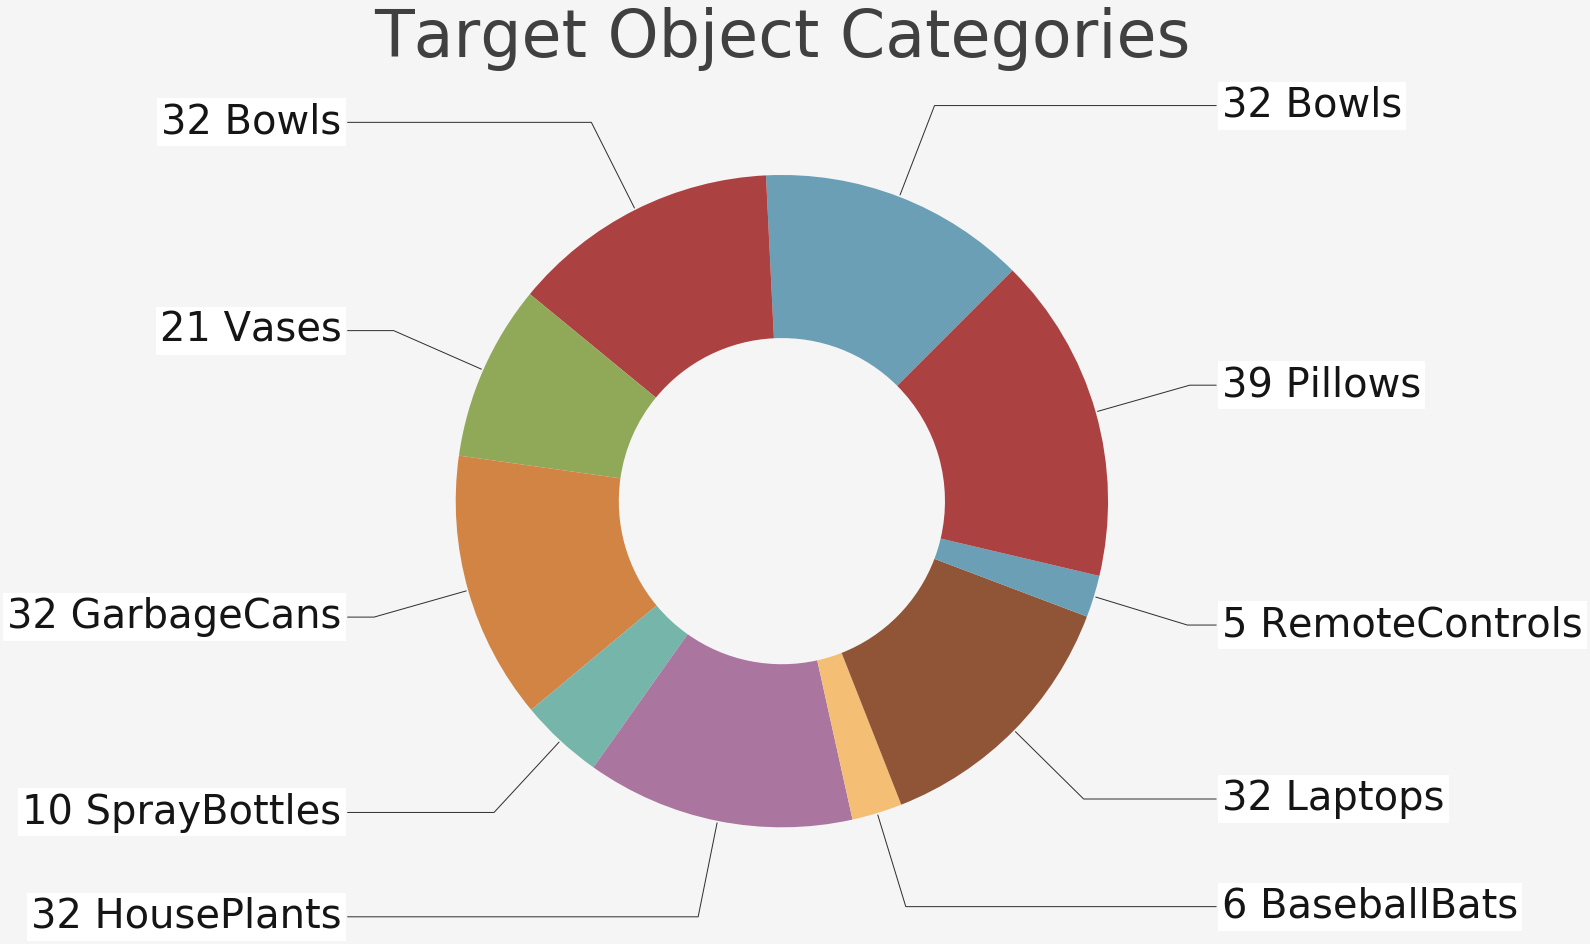

In [297]:
obj_only_df = furn_obj_df[furn_obj_df.category == 'object']
target_df = obj_only_df[obj_only_df.role == 'expanded target']
obj_cat_counts = target_df.groupby('objectType')['name'].nunique()
donut_data = list(obj_cat_counts.to_dict().items())
donut_data = sorted(donut_data, key=lambda x: x[1])
donut_data = [val for pair in zip(donut_data[:len(donut_data)//2 + 1][::-1], donut_data[len(donut_data)//2:]) for val in pair]

fig_labels = {
    'fig_title': 'Target Object Categories',
      'x_label': '',
      'y_label': ''
}


fig_out = make_donut_plot(donut_data, 45)
_ = make_donut_fig(fig_out, fig_labels, save=True, outfile='./figures/target_cats.pdf')

## heatmaps

### objects

In [73]:
def make_heatmap(w_dfm, bin_size=0.3, vmax=20):
    _ = plt.hist2d(w_df.x, w_df.z, bins=[np.arange(1, 10, bin_size), np.arange(-5, -0.8, bin_size)], cmap='viridis')
    _ = plt.axes().set_aspect('equal')
#     _ = plt.colorbar()

In [102]:
multiscene_reachable = {k: v.metadata['actionReturn'] for k, v in  multi_scene_reachable_pos.items()}
build_reachable_df = [p for s in list(multiscene_reachable.values()) for p in s]
reachable_df = pd.DataFrame(build_reachable_df)[['x', 'z']]

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


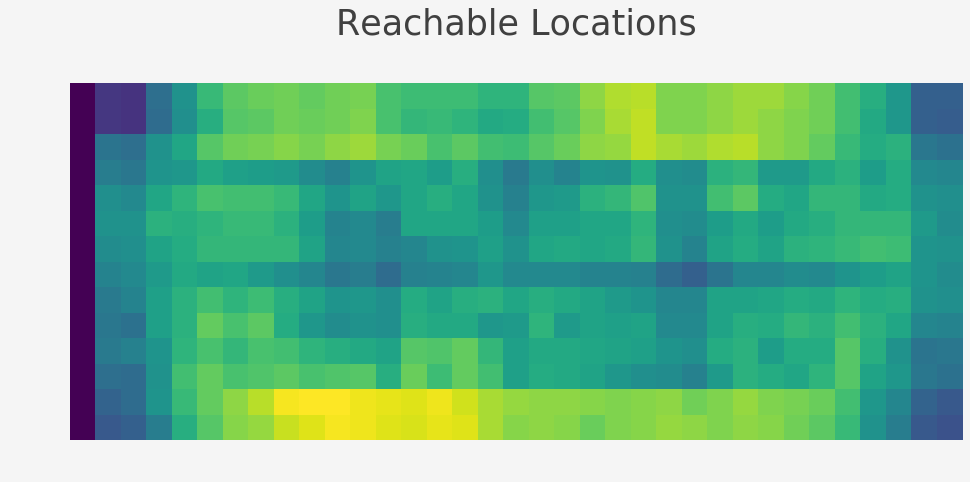

In [176]:
fig_labels = {
    'fig_title': 'Reachable Locations',
      'x_label': '',
      'y_label': ''
}
w_df = reachable_df
make_heatmap(w_df, 0.25, 7)
_ = plt.axis('off')
# plt.xlim(1.25, 8.25)
plt.ylim(-4.5, -1)
make_standard_fig(_, fig_labels, save=True, outfile='./figures/reachable_points.pdf')

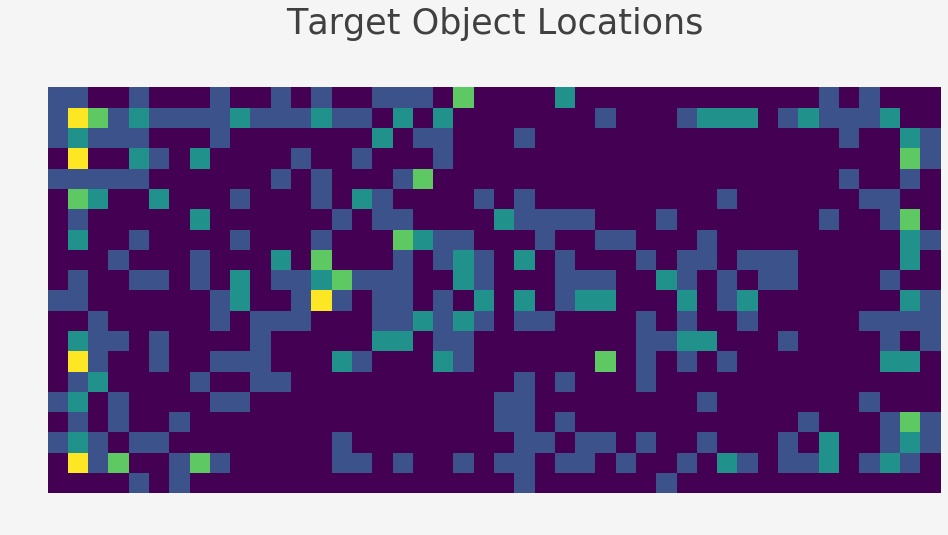

In [177]:
fig_labels = {
    'fig_title': 'Target Object Locations',
      'x_label': '',
      'y_label': ''
}
w_df = furn_obj_df[furn_obj_df.role == 'target']
make_heatmap(w_df, 0.2, 7)
_ = plt.axis('off')
# plt.xlim(1.25, 8.25)
# plt.ylim(-4.50, -1.25)
make_standard_fig(_, fig_labels, save=True, outfile='./figures/target_heatmap.pdf')

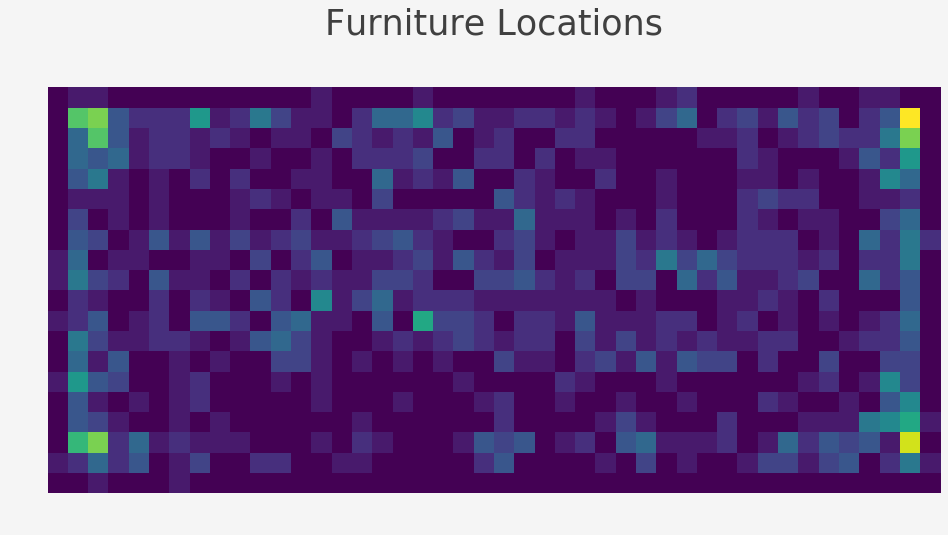

In [178]:
fig_labels = {
    'fig_title': 'Furniture Locations',
      'x_label': '',
      'y_label': ''
}
w_df = furn_obj_df[furn_obj_df.category == 'furniture']
make_heatmap(w_df, 0.2, 7)
# plt.xlim(1.25 , 8.25)
# plt.ylim(-4.50, -1.25)
_ = plt.axis('off')
make_standard_fig(_, fig_labels, save=True, outfile='./figures/furniture_heatmap.pdf')

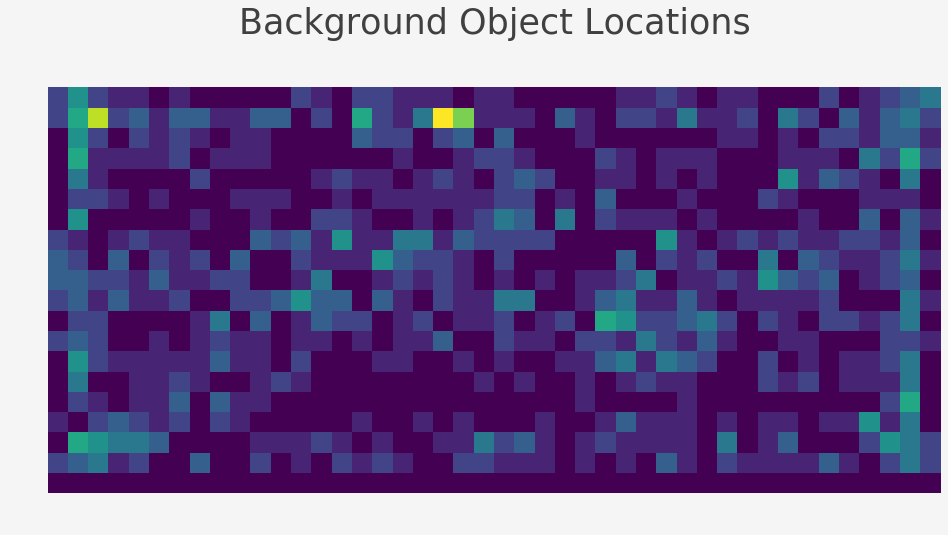

In [179]:
fig_labels = {
    'fig_title': 'Background Object Locations',
      'x_label': '',
      'y_label': ''
}
obj_only_df = furn_obj_df[furn_obj_df.category == 'object']
w_df = obj_only_df[obj_only_df.role == 'background']
make_heatmap(w_df, 0.2, 7)
_ = plt.axis('off')
make_standard_fig(_, fig_labels, save=True, outfile='./figures/background_heatmap.pdf')

### walls

In [92]:
ti = '/Users/schwenk/Downloads/floorplans'

In [94]:
def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshd = cv2.threshold(img, 253, 255,cv2.THRESH_BINARY)
    threshd = (255 - threshd)
    trim = 50
    h, w = img.shape
    return threshd[trim: h - 120, trim: w - 120]

In [97]:
allfloorplans = os.listdir(ti)

floorplan_images = [read_img(os.path.join(ti, i)) for i in allfloorplans]

fp_arr = np.zeros(floorplan_images[0].shape, np.float)
for im in floorplan_images:
    imarr = np.array(im, dtype=np.float)
    fp_arr = fp_arr + imarr / len(floorplan_images) 
fp_arr = fp_arr * 255 / fp_arr.max()
fp_arr = np.array(np.round(fp_arr), dtype=np.uint8)

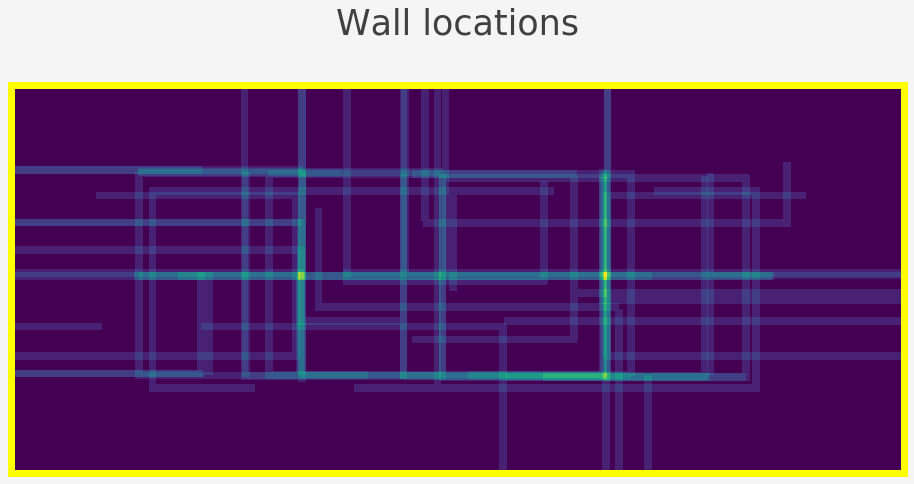

In [180]:
fig_labels = {
    'fig_title': 'Wall locations',
      'x_label': '',
      'y_label': ''
}

cmap = plt.get_cmap('viridis')

rgba_img = cmap(fp_arr)
rgb_img = np.delete(rgba_img, 3, 2)
ax = plt.axes()
_ = ax.set_aspect('equal')
_= plt.imshow(rgb_img)
plt.xticks([])
plt.yticks([])
plt.rcParams["axes.edgecolor"] = "yellow"
plt.rcParams["axes.linewidth"] = 7
make_standard_fig(_, fig_labels, save=True, outfile='./figures/wall_heatmap.pdf')
plt.rcParams["axes.edgecolor"] = "white"